<a href="https://colab.research.google.com/github/693080593/research/blob/master/%5B5%5D_HHV_cHB_R%26L_KFold.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd

# Import supplementary visualizations code visuals.py
import visuals as vs


# Pretty display for notebooks
%matplotlib inline

# Load the dataset
data = pd.read_csv(r'/content/Feed Effect on Biocrude HHV Data ML 111020.csv')
Oil_HHV = data['Bio-crude Oil HHV']
Features = data.drop('Bio-crude Oil HHV', axis = 1)

# Success
print ("Bio-crude HHV dataset has {} data points with {} variables each.".format(*data.shape))
data.shape

data[:240:30]


Bio-crude HHV dataset has 123 data points with 8 variables each.


,Lipid,Protein,Cellulose,Hemicellulose,Carbohydrate,Lignin,Ash,Bio-crude Oil HHV
0,1.7,27.2,14.4,3.5,0.0,5.7,47.5,25.8
30,0.0,0.0,45.5,45.5,0.0,9.1,0.0,39.2
60,0.0,6.5,52.8,0.0,0.0,38.7,1.1,26.2
90,23.6,42.0,0.0,0.0,5.9,0.0,26.4,34.5
120,0.1,71.3,0.5,0.3,22.0,0.2,5.6,38.5


In [2]:
# Check the dataset with the first and last three rows
pd.set_option('display.max_rows',6)
data

,Lipid,Protein,Cellulose,Hemicellulose,Carbohydrate,Lignin,Ash,Bio-crude Oil HHV
0,1.7,27.2,14.4,3.5,0.0,5.7,47.5,25.8
1,6.4,26.5,11.8,9.5,0.0,5.2,39.7,27.5
2,11.0,25.9,9.1,15.4,0.0,4.7,31.9,22.0
...,...,...,...,...,...,...,...,...
120,0.1,71.3,0.5,0.3,22.0,0.2,5.6,38.5
121,11.2,49.2,0.0,0.0,31.2,0.0,6.6,35.3
122,14.0,59.0,0.0,0.0,20.0,0.0,3.0,38.0


In [3]:
# Check the whole information of the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123 entries, 0 to 122
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Lipid              123 non-null    float64
 1   Protein            123 non-null    float64
 2   Cellulose          123 non-null    float64
 3   Hemicellulose      123 non-null    float64
 4   Carbohydrate       123 non-null    float64
 5   Lignin             123 non-null    float64
 6   Ash                123 non-null    float64
 7   Bio-crude Oil HHV  123 non-null    float64
dtypes: float64(8)
memory usage: 7.8 KB


In [4]:
# TODO: Minimum price of the data
minimum_Oil_HHV = np.min(Oil_HHV)

# TODO: Maximum price of the data
maximum_Oil_HHV = np.max(Oil_HHV)

# TODO: Mean price of the data
mean_Oil_HHV = np.mean(Oil_HHV)

# TODO: Median price of the data
median_Oil_HHV = np.median(Oil_HHV)

# TODO: Standard deviation of prices of the data
std_Oil_HHV = np.std(Oil_HHV)

# Show the calculated statistics

print("Statistics for bio-crude HHV dataset:\n")
print("Minimum bio-crude oil HHV:{: .2f} MJ/kg".format(minimum_Oil_HHV))
print("Maximum bio-crude oil HHV:{: .2f} MJ/kg".format(maximum_Oil_HHV))
print("Mean bio-crude oil HHV:{: .2f} MJ/kg".format(mean_Oil_HHV))
print("Median bio-crude oil HHV:{: .2f} MJ/kg".format(median_Oil_HHV))
print("Standard deviation of bio-crude oil HHV:{: .2f} MJ/kg".format(std_Oil_HHV))

data.describe()

Statistics for bio-crude HHV dataset:

Minimum bio-crude oil HHV: 17.70 MJ/kg
Maximum bio-crude oil HHV: 44.40 MJ/kg
Mean bio-crude oil HHV: 33.22 MJ/kg
Median bio-crude oil HHV: 34.00 MJ/kg
Standard deviation of bio-crude oil HHV: 5.09 MJ/kg


,Lipid,Protein,Cellulose,Hemicellulose,Carbohydrate,Lignin,Ash,Bio-crude Oil HHV
count,123.000000,123.000000,123.000000,123.000000,123.000000,123.000000,123.000000,123.000000
mean,8.754472,24.526016,20.039837,8.446341,18.629268,8.554472,7.239024,33.221138
std,16.802543,26.330998,27.646648,16.922036,25.908710,14.504868,11.343089,5.108098
...,...,...,...,...,...,...,...,...
50%,1.700000,17.600000,1.000000,0.000000,9.000000,0.000000,3.000000,34.000000
75%,11.050000,44.050000,39.600000,9.200000,25.850000,14.300000,7.500000,36.550000
max,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,47.500000,44.400000


In [5]:
# Skewness coefficient
for i in data.columns:
  print('{} Skewness coefficient: '.format(i),data[i].skew())

Lipid Skewness coefficient:  3.569132791152984
Protein Skewness coefficient:  0.870860205073259
Cellulose Skewness coefficient:  1.3283729140090017
Hemicellulose Skewness coefficient:  2.7781066309358473
Carbohydrate Skewness coefficient:  2.008322377190648
Lignin Skewness coefficient:  2.8565467704463687
Ash Skewness coefficient:  2.1253719916234477
Bio-crude Oil HHV Skewness coefficient:  -0.48929877117154447


In [6]:
# Kurtosis Coefficient
for i in data.columns:
  print("{} Kurtosis Coefficient: ".format(i),data[i].kurt())

Lipid Kurtosis Coefficient:  15.122245775754337
Protein Kurtosis Coefficient:  -0.0044184066594077365
Cellulose Kurtosis Coefficient:  0.870639509732015
Hemicellulose Kurtosis Coefficient:  9.546842303004492
Carbohydrate Kurtosis Coefficient:  3.872985151903222
Lignin Kurtosis Coefficient:  12.669943477969987
Ash Kurtosis Coefficient:  3.818776901627681
Bio-crude Oil HHV Kurtosis Coefficient:  0.15990513963111175


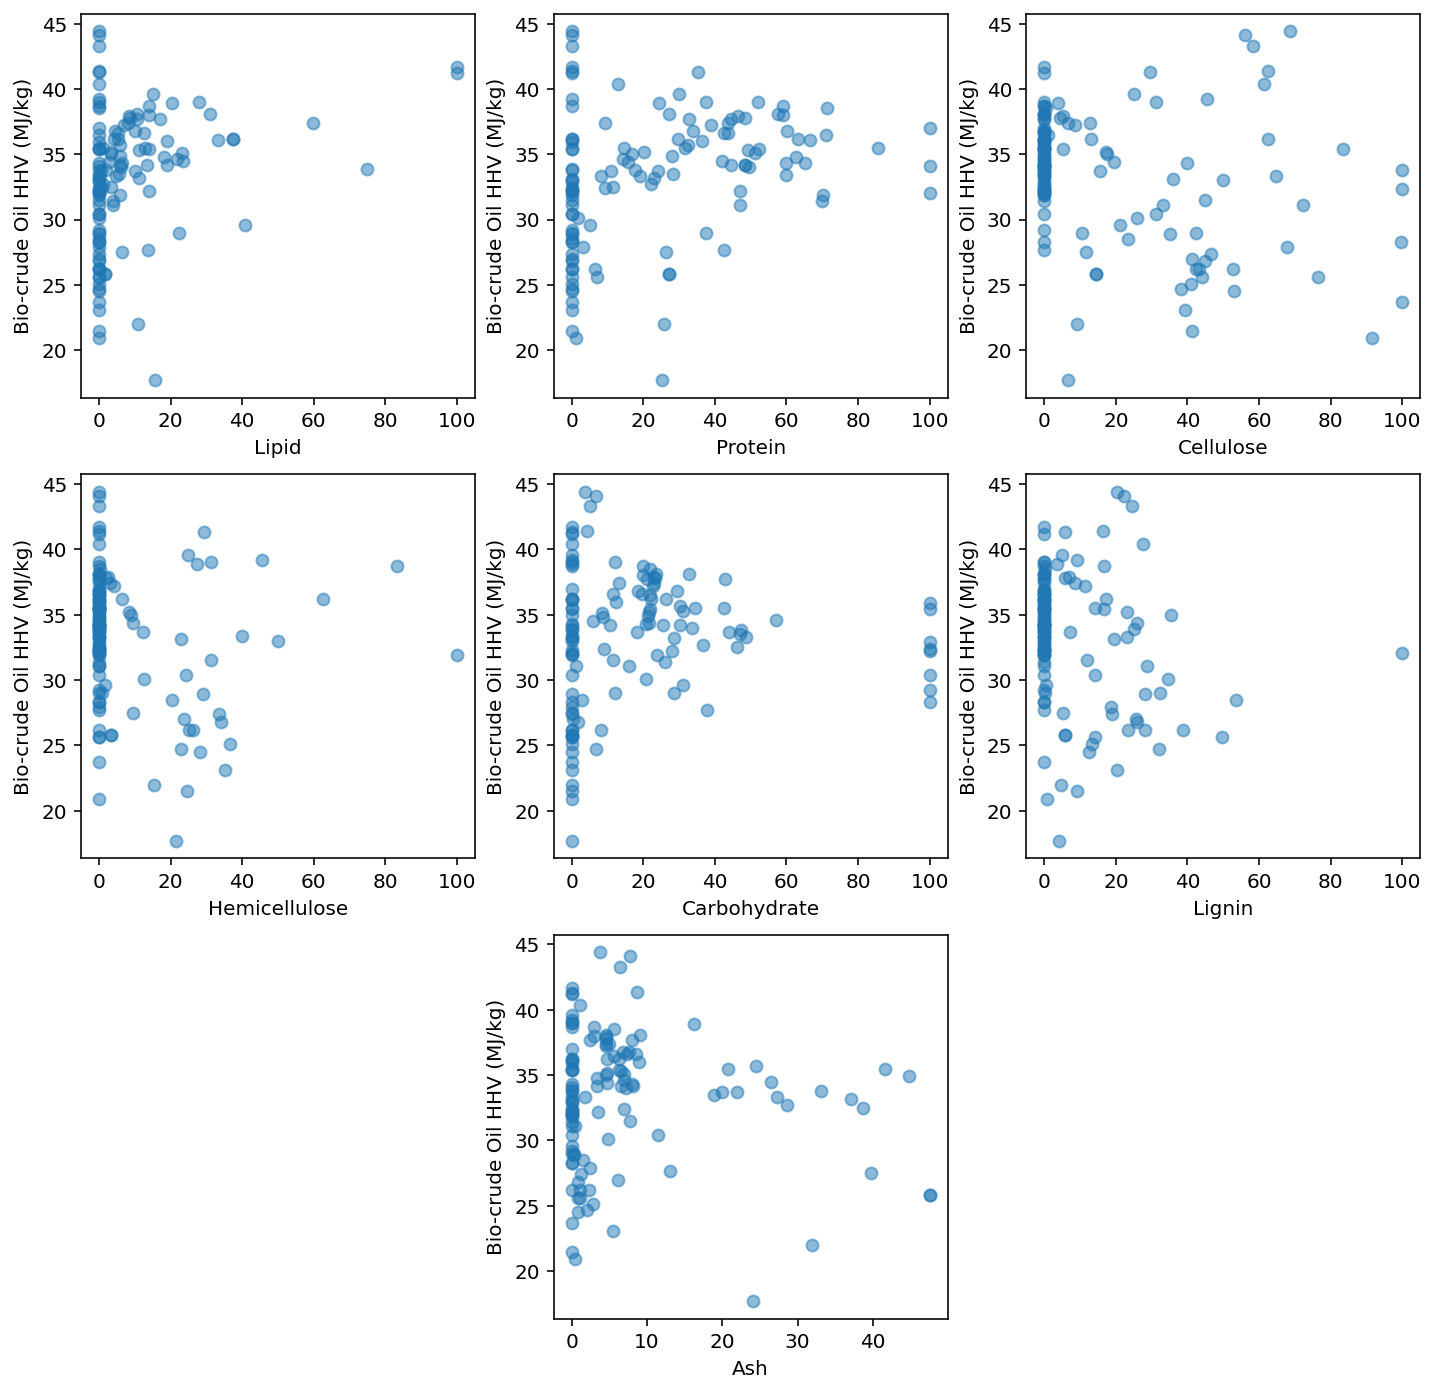

In [7]:
# Load matplotlib
import matplotlib.pyplot as plt

# Show the figure with higher resolution
%config InlineBackend.figure_format = 'retina'

# Adjust the size of figure
plt.figure(figsize=(12,12))

plt.subplot(331)
plt.xlabel('Lipid')
plt.ylabel('Bio-crude Oil HHV (MJ/kg)')
plt.scatter(data['Lipid'],data['Bio-crude Oil HHV'],alpha = 0.5)

plt.subplot(332)
plt.xlabel('Protein')
plt.ylabel('Bio-crude Oil HHV (MJ/kg)')
plt.scatter(data['Protein'],data['Bio-crude Oil HHV'],alpha = 0.5)

plt.subplot(333)
plt.xlabel('Cellulose')
plt.ylabel('Bio-crude Oil HHV (MJ/kg)')
plt.scatter(data['Cellulose'],data['Bio-crude Oil HHV'],alpha = 0.5)

plt.subplot(334)
plt.xlabel('Hemicellulose')
plt.ylabel('Bio-crude Oil HHV (MJ/kg)')
plt.scatter(data['Hemicellulose'],data['Bio-crude Oil HHV'],alpha = 0.5)

plt.subplot(335)
plt.xlabel('Carbohydrate')
plt.ylabel('Bio-crude Oil HHV (MJ/kg)')
plt.scatter(data['Carbohydrate'],data['Bio-crude Oil HHV'],alpha = 0.5)

plt.subplot(336)
plt.xlabel('Lignin')
plt.ylabel('Bio-crude Oil HHV (MJ/kg)')
plt.scatter(data['Lignin'],data['Bio-crude Oil HHV'],alpha = 0.5)

plt.subplot(338)
plt.xlabel('Ash')
plt.ylabel('Bio-crude Oil HHV (MJ/kg)')
plt.scatter(data['Ash'],data['Bio-crude Oil HHV'],alpha = 0.5)
plt.show()

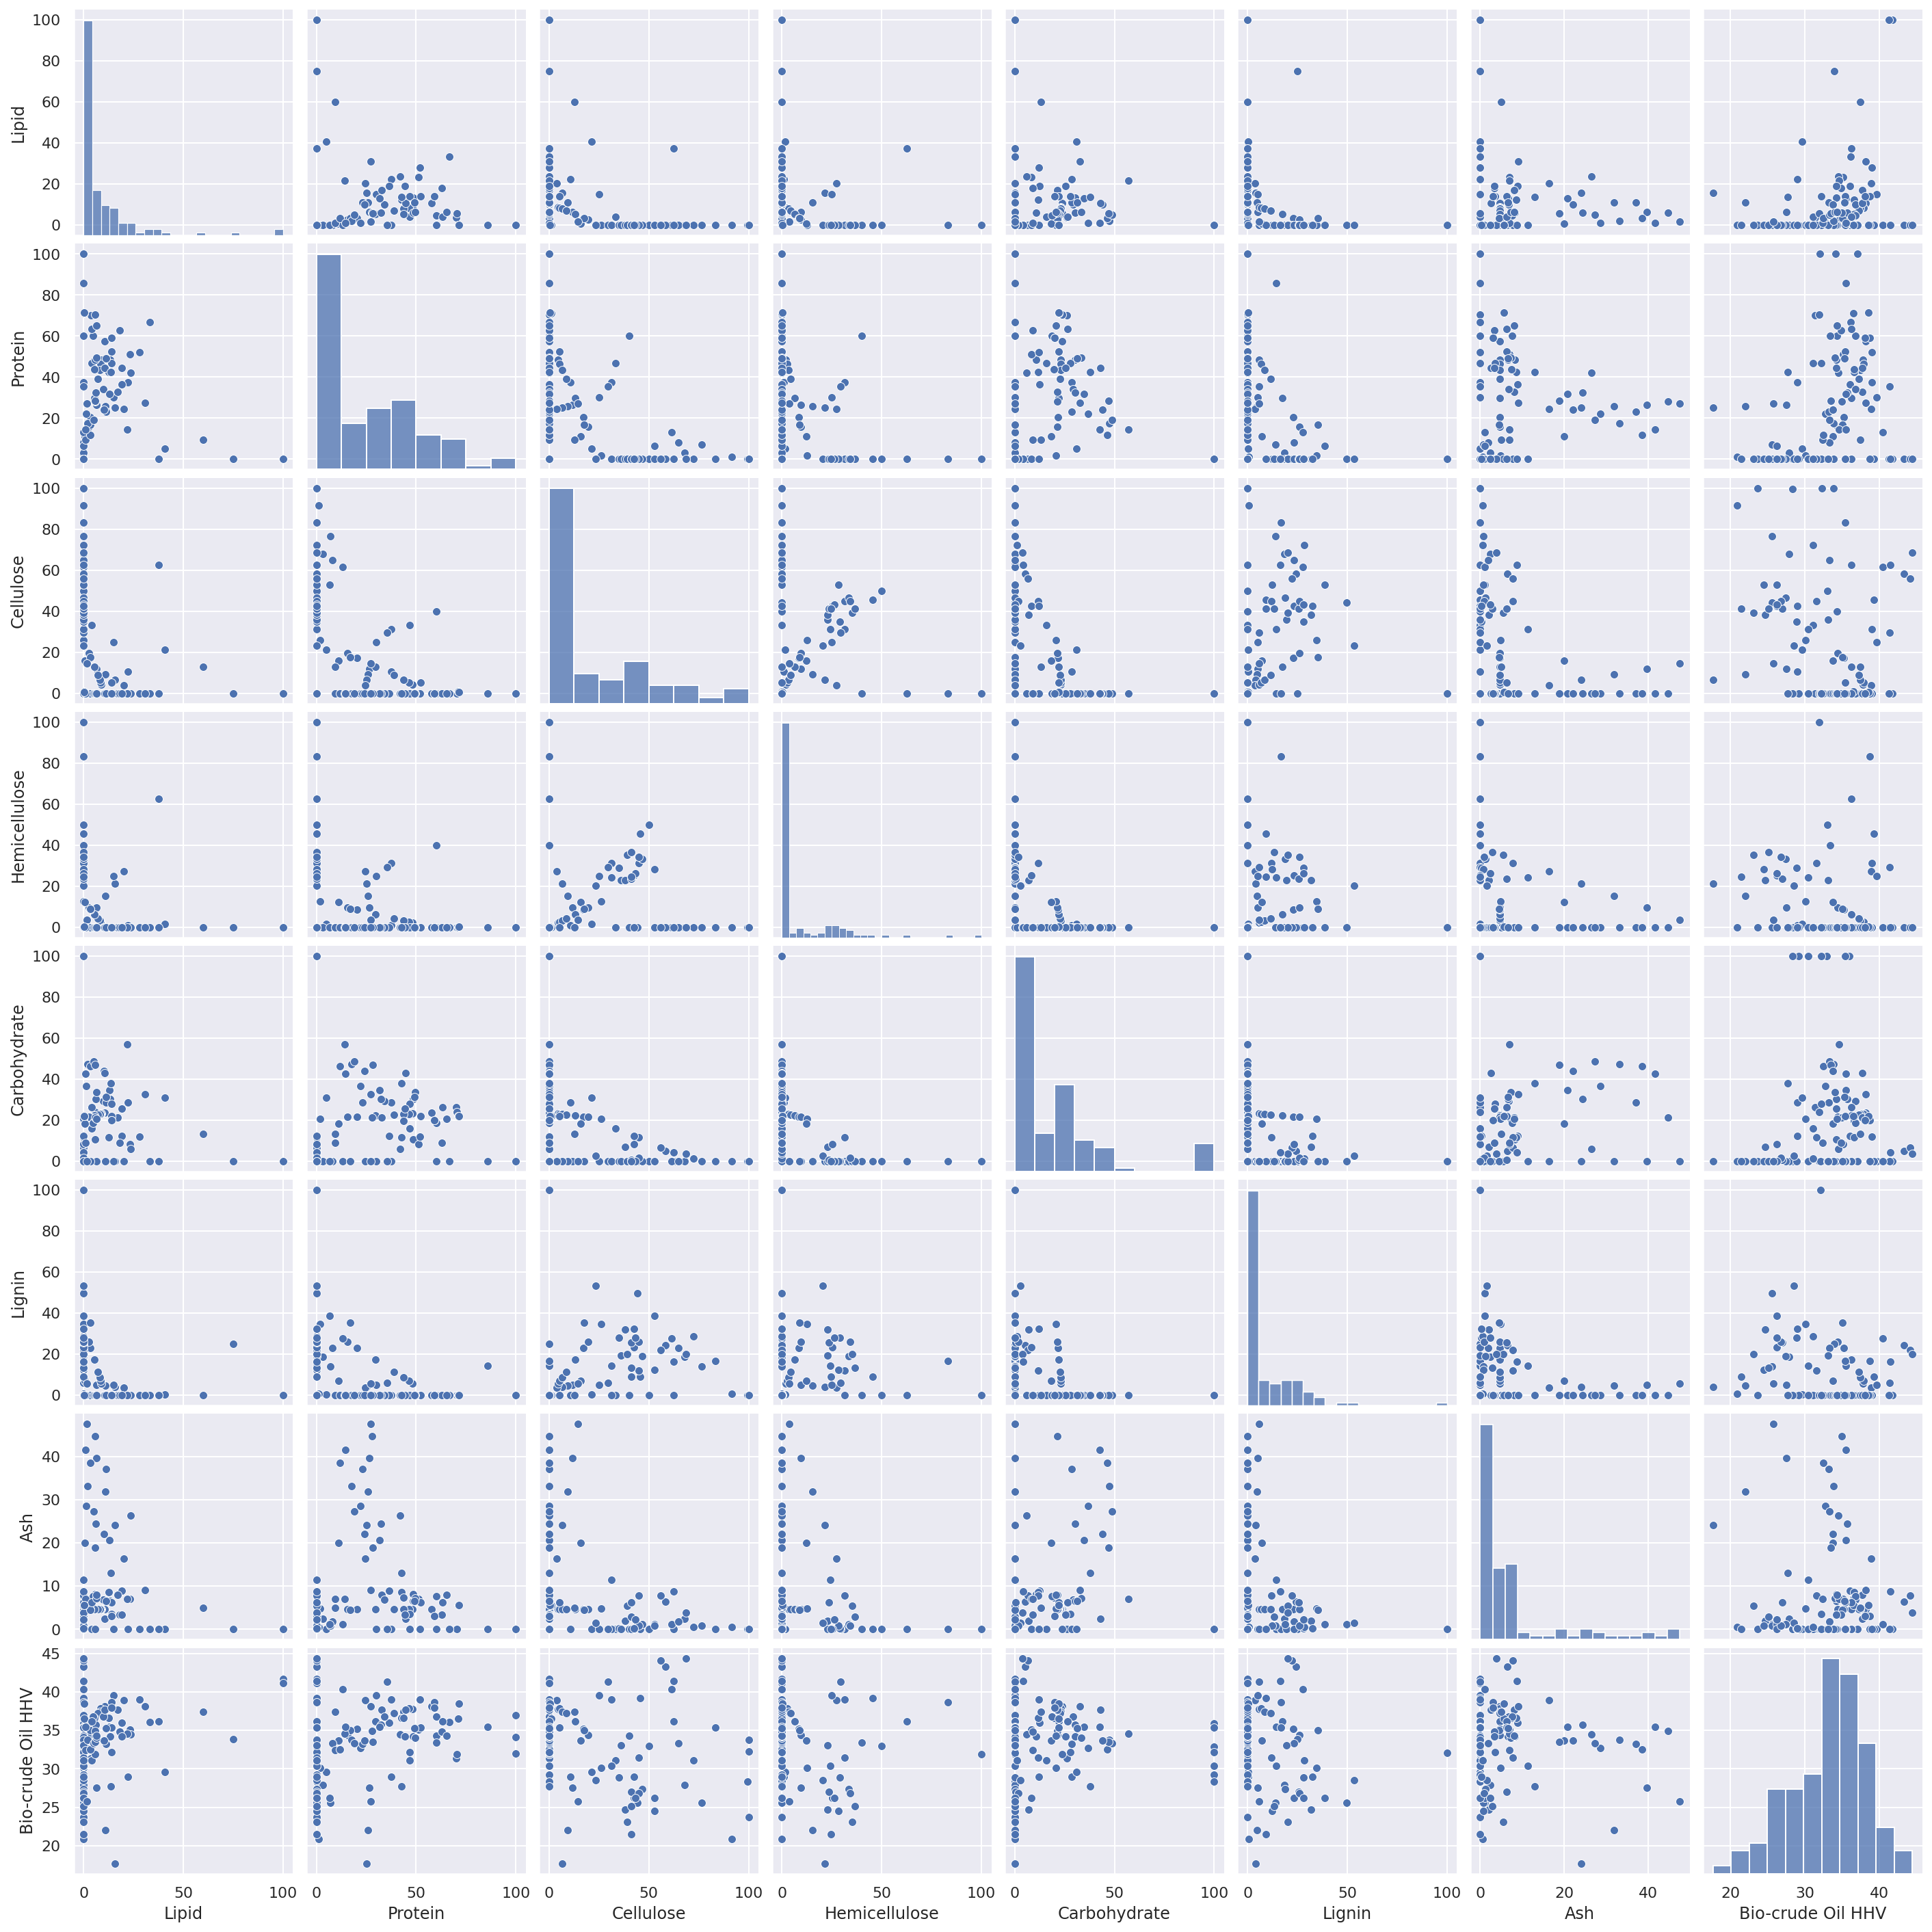

In [8]:
# Scatter plot
import seaborn as sns
import matplotlib.pyplot as plt

# Initialization
sns.set()

# Draw the distribution matrix
sns.pairplot(data)

# save figure
plt.savefig('cHB.png')
plt.show()

(array([1., 0., 0., 0., 0., 1., 0., 1., 1., 0., 1., 1., 1., 2., 2., 5., 0.,
        2., 3., 3., 2., 3., 1., 3., 0., 4., 4., 6., 4., 7., 8., 5., 6., 7.,
        7., 5., 4., 4., 4., 5., 1., 1., 1., 0., 4., 0., 0., 1., 0., 2.]),
 array([17.7  , 18.234, 18.768, 19.302, 19.836, 20.37 , 20.904, 21.438,
        21.972, 22.506, 23.04 , 23.574, 24.108, 24.642, 25.176, 25.71 ,
        26.244, 26.778, 27.312, 27.846, 28.38 , 28.914, 29.448, 29.982,
        30.516, 31.05 , 31.584, 32.118, 32.652, 33.186, 33.72 , 34.254,
        34.788, 35.322, 35.856, 36.39 , 36.924, 37.458, 37.992, 38.526,
        39.06 , 39.594, 40.128, 40.662, 41.196, 41.73 , 42.264, 42.798,
        43.332, 43.866, 44.4  ]),
 <a list of 50 Patch objects>)

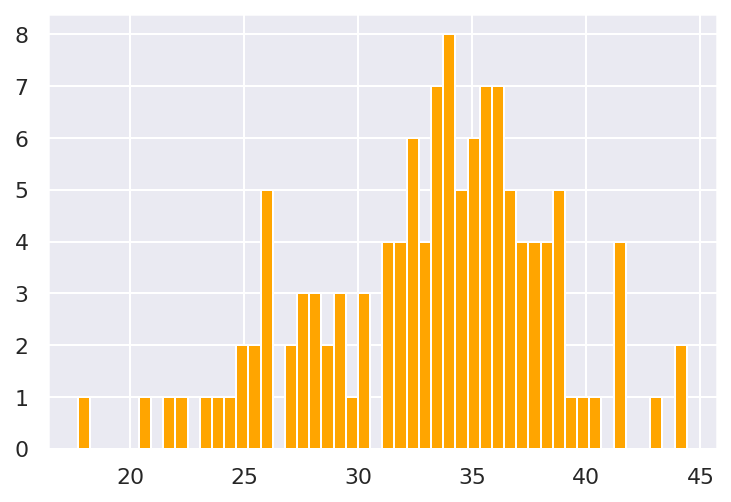

In [9]:
plt.hist(data['Bio-crude Oil HHV'],bins=50,color='orange')

(array([63.,  7.,  9.,  5.,  3.,  7.,  5.,  5.,  1.,  3.,  2.,  3.,  0.,
         0.,  1.,  1.,  1.,  0.,  2.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  2.]),
 array([  0.,   2.,   4.,   6.,   8.,  10.,  12.,  14.,  16.,  18.,  20.,
         22.,  24.,  26.,  28.,  30.,  32.,  34.,  36.,  38.,  40.,  42.,
         44.,  46.,  48.,  50.,  52.,  54.,  56.,  58.,  60.,  62.,  64.,
         66.,  68.,  70.,  72.,  74.,  76.,  78.,  80.,  82.,  84.,  86.,
         88.,  90.,  92.,  94.,  96.,  98., 100.]),
 <a list of 50 Patch objects>)

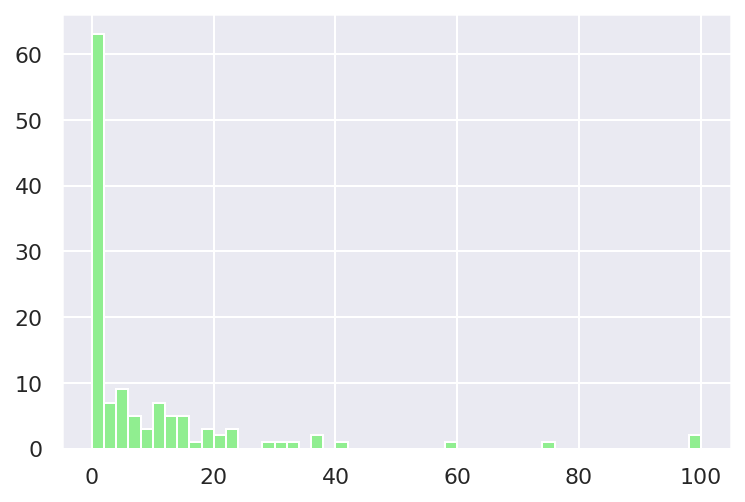

In [10]:
plt.hist(data['Lipid'],bins=50,color='lightgreen')


In [11]:
# As correlation coefficient was estimated, the default is Pearson correlation coefficient.
correlation = data.corr()
correlation

,Lipid,Protein,Cellulose,Hemicellulose,Carbohydrate,Lignin,Ash,Bio-crude Oil HHV
Lipid,1.000000,0.004071,-0.281330,-0.142354,-0.096410,-0.214182,-0.053346,0.284168
Protein,0.004071,1.000000,-0.515486,-0.306655,-0.059095,-0.406277,0.045953,0.288780
Cellulose,-0.281330,-0.515486,1.000000,0.088598,-0.440941,0.316828,-0.278343,-0.272423
...,...,...,...,...,...,...,...,...
Lignin,-0.214182,-0.406277,0.316828,0.137036,-0.325587,1.000000,-0.198828,-0.203227
Ash,-0.053346,0.045953,-0.278343,-0.155231,0.058746,-0.198828,1.000000,-0.110848
Bio-crude Oil HHV,0.284168,0.288780,-0.272423,-0.159297,0.066686,-0.203227,-0.110848,1.000000


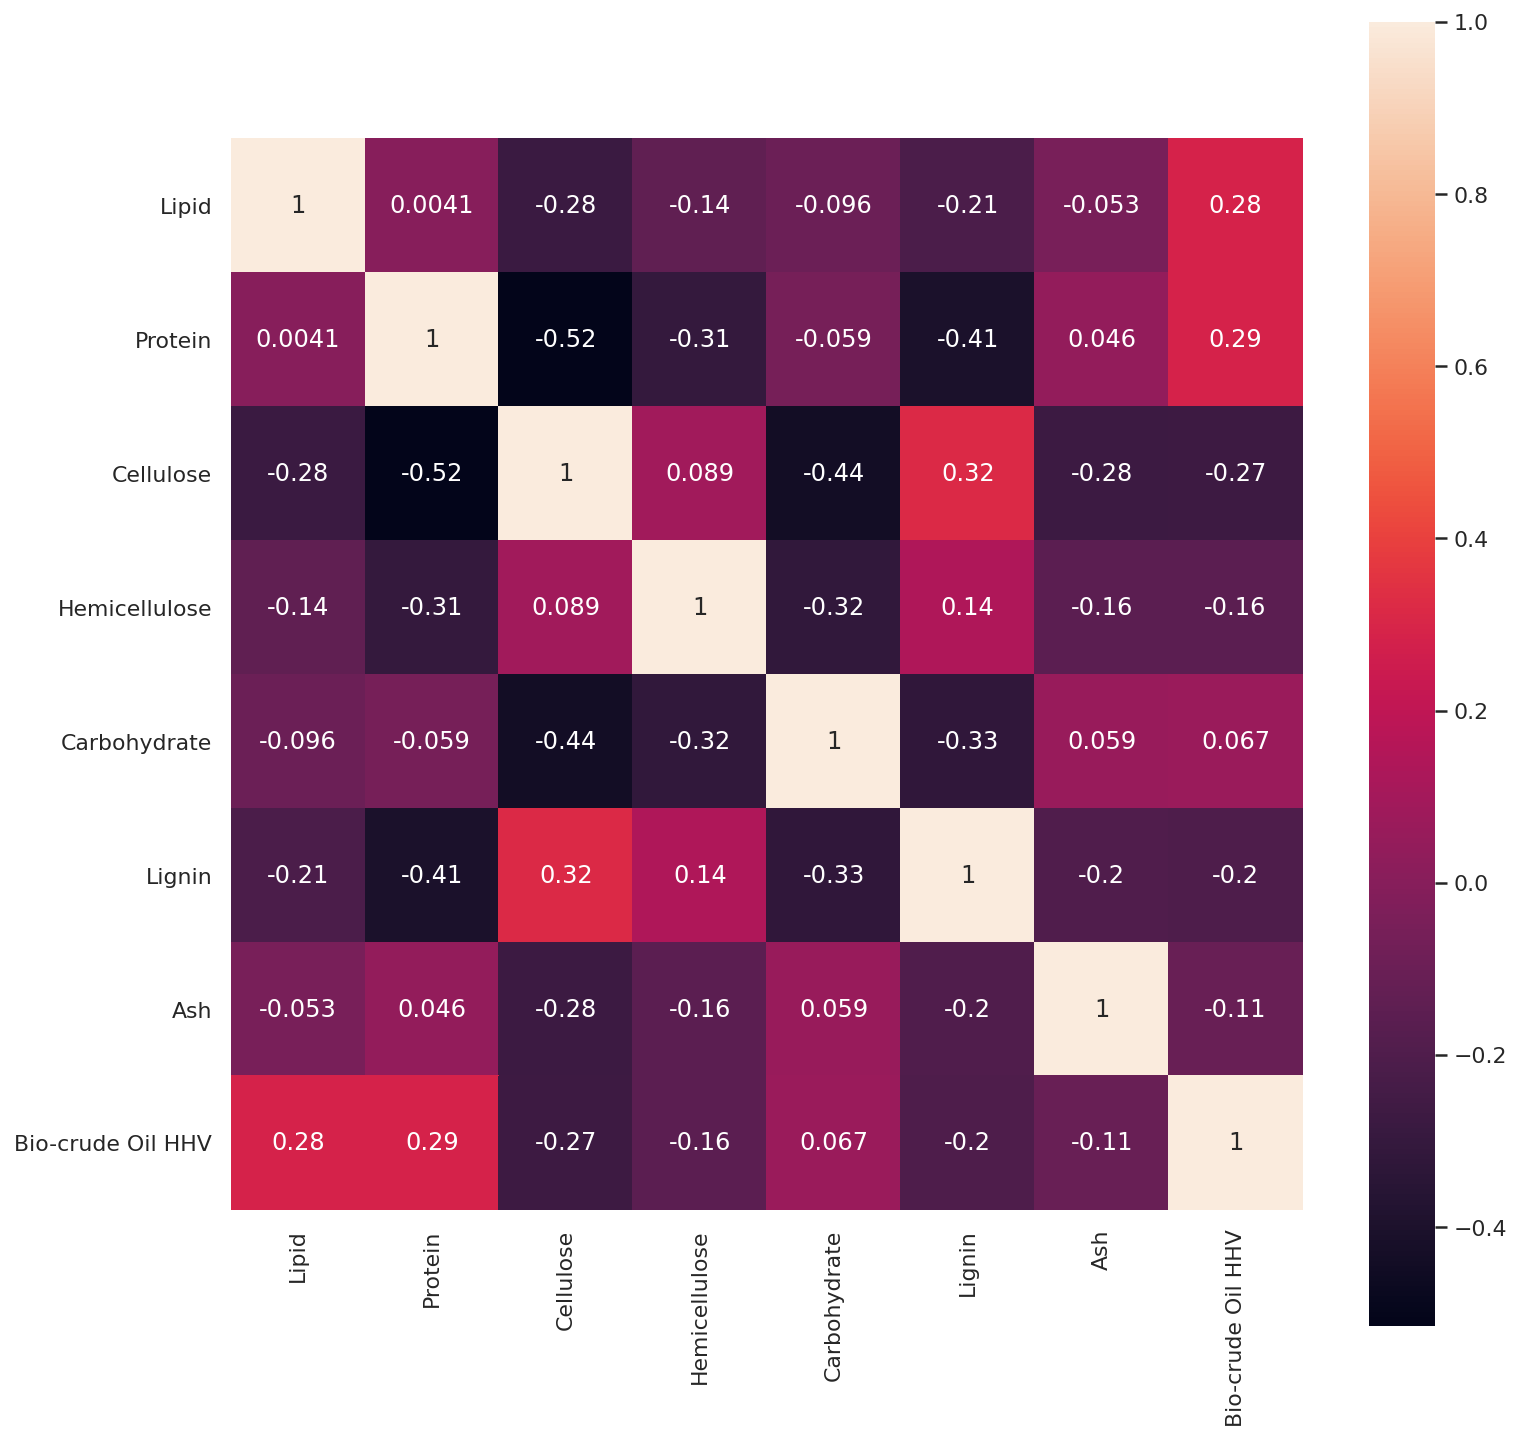

In [12]:
# Correlation
import seaborn as sns
fig=plt.figure(figsize=(12,12))
sns.heatmap(data.corr(),vmax=1,square=True,annot=True)
plt.show()

In [13]:
import numpy as np
# The mean relative error (MRE) is commonly used to measure the predictive accuracy of models.

def performance_metric(y_true, y_predict):
  """Calculates and returns the performance score between 
        true and predicted values based on the metric chosen."""
  # TODO: Calculate the performance score between 'y_true' and 'y_predict'

  return np.mean(np.abs(y_true-y_predict))/np.mean(y_true)

In [14]:
# Ridge Regression
# Model set up & training
from sklearn.linear_model import Ridge

# TODO: Import 'KFold'
from sklearn.model_selection import KFold

# TODO Calculate the r2 score between 'y_true' and 'y_predict'
from math import sqrt
from sklearn import metrics

np.random.seed(seed = 154)
data['random'] = np.random.random(size = len(data))

# Lets split the data into 3 folds.  
kf =KFold(n_splits=3, shuffle=True)

cnt = 1

rd_intercept_all=[]
rd_coef_all=[]

MAE_train_all=[]
MAE_test_all=[]
y_train_rmse_all=[]
y_test_rmse_all=[]
r2_train_all=[]
r2_test_all=[]
MRE_train_all=[]
MRE_test_all=[]
y_test_list=[]
y_pred_list=[]

# split()  method generate indices to split data into training and test set.
for train_index, test_index in kf.split(Features, Oil_HHV):
    # print(f'Fold:{cnt}, Train set: {len(train_index)}, Test set:{len(test_index)}')
    
    #fixed by Wenjing
    X_train, X_test = Features.iloc[train_index,:],Features.iloc[test_index,:]
    y_train, y_test = Oil_HHV.iloc[train_index],Oil_HHV.iloc[test_index]
    
    # Alpha here is regularization parameter, initialize as 1.
    rd = Ridge(alpha=1)
    rd.fit(X_train, y_train)
    # print(rd.coef_)
    # print(rd.intercept_)

    # Predict training set and test set
    y_train_predict = rd.predict(X_train)
    y_test_predict = rd.predict(X_test)

    MAE_train = metrics.mean_absolute_error(y_train, y_train_predict)
    MAE_test = metrics.mean_absolute_error(y_test, y_test_predict)

    y_train_rmse = sqrt(metrics.mean_squared_error(y_train, y_train_predict))
    y_test_rmse = sqrt(metrics.mean_squared_error(y_test, y_test_predict))

    r2_train = metrics.r2_score(y_train, y_train_predict)
    r2_test = metrics.r2_score(y_test, y_test_predict)

    MRE_train = performance_metric(y_train, y_train_predict)
    MRE_test = performance_metric(y_test, y_test_predict)

    # print("Optimal model has MAE of training set:", MAE_train)
    # print("Optimal model has MAE of test set:", MAE_test)
    # print("Optimal model has RMSE of training set:", y_train_rmse)
    # print("Optimal model has RMSE of test set:", y_test_rmse)
    # print("Optimal model has R2 score of training set {:,.2f} on training data.".format(r2_train))
    # print("Optimal model has R2 score of test set {:,.2f} on test data.".format(r2_test))
    # print("Optimal model has MRE of training set:", MRE_train)
    # print("Optimal model has MRE of test set:", MRE_test)
    # print("")

    cnt += 1
    rd_intercept_all.append(rd.intercept_)
    rd_coef_all.append(rd.coef_)
    MAE_train_all.append(MAE_train)
    MAE_test_all.append(MAE_test)
    y_train_rmse_all.append(y_train_rmse)
    y_test_rmse_all.append(y_test_rmse)
    r2_train_all.append(r2_train)
    r2_test_all.append(r2_test)
    MRE_train_all.append(MRE_train)
    MRE_test_all.append(MRE_test)
    y_test_list.append(y_test.values)
    y_pred_list.append(y_test_predict)

y_test_all=np.concatenate(y_test_list, axis=0)
y_pred_all=np.concatenate(y_pred_list, axis=0)

print("Mean value of rd.intercept",np.mean(rd_intercept_all))
print("Standard deviation of rd.intercept",np.std(rd_intercept_all))
print("Mean values of rd.coef",np.mean(rd_coef_all, axis=0))
print("Standard deviations of rd.coef",np.std(rd_coef_all, axis=0))
print("")
print("Mean value of MAE of training set", np.mean(MAE_train_all))
print("Standard deviation of MAE of training set", np.std(MAE_train_all))
print("Mean value of MAE of test set", np.mean(MAE_test_all))
print("Standard deviation of MAE of test set", np.std(MAE_test_all))
print("")
print("Mean value of RMSE of training set", np.mean(y_train_rmse_all))
print("Standard deviation of RMSE of training set", np.std(y_train_rmse_all))
print("Mean value of RMSE of test set", np.mean(y_test_rmse_all))
print("Standard deviation of RMSE of test set", np.std(y_test_rmse_all))
print("")
print("Mean value of R2 of training set", np.mean(r2_train_all))
print("Standard deviation of R2 of training set", np.std(r2_train_all))
print("Mean value of R2 of test set", np.mean(r2_test_all))
print("Standard deviation of R2 of test set", np.std(r2_test_all))
print("")
print("Mean value of MRE of training set", np.mean(MRE_train_all))
print("Standard deviation of MRE of training set", np.std(MRE_train_all))
print("Mean value of MRE of test set", np.mean(MRE_test_all))
print("Standard deviation of MRE of test set", np.std(MRE_test_all))

#print(len(np.concatenate(y_test_list, axis=0)))
#print(len(np.concatenate(y_pred_list, axis=0)))

Mean value of rd.intercept 35.5604770594448
Standard deviation of rd.intercept 3.9922217416657015
Mean values of rd.coef [ 0.04216481  0.01096311 -0.0494784  -0.04494759 -0.02327406 -0.04848247
 -0.10209422]
Standard deviations of rd.coef [0.03291904 0.05273441 0.04216776 0.04664377 0.033172   0.04680781
 0.05030874]

Mean value of MAE of training set 3.378927601383591
Standard deviation of MAE of training set 0.21578587630304746
Mean value of MAE of test set 3.684823373261603
Standard deviation of MAE of test set 0.3960730432148533

Mean value of RMSE of training set 4.508031280153653
Standard deviation of RMSE of training set 0.28114727509739434
Mean value of RMSE of test set 4.794901642814566
Standard deviation of RMSE of test set 0.5950237125511537

Mean value of R2 of training set 0.21210814186984503
Standard deviation of R2 of training set 0.03105425629745957
Mean value of R2 of test set 0.09908831426392621
Standard deviation of R2 of test set 0.06414944976990825

Mean value of M

Text(0.5, 1.0, 'y_pred vs. y_true')

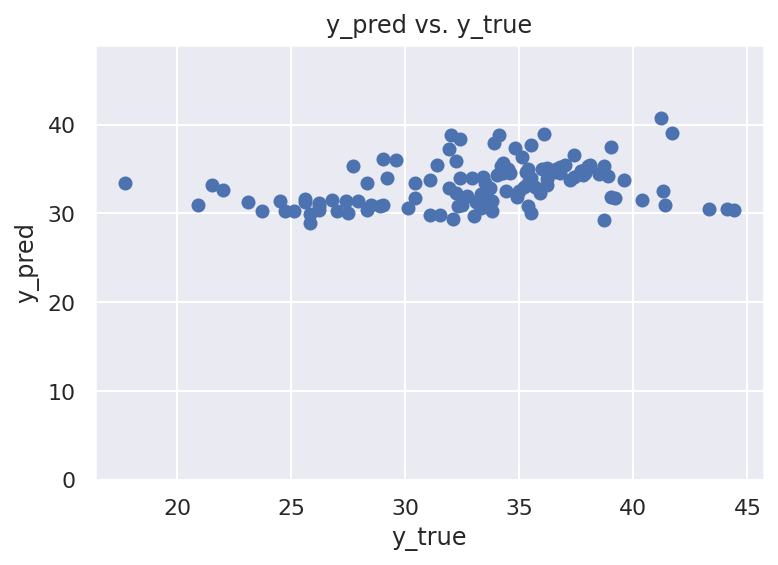

In [15]:
import matplotlib.pyplot as py
py.plot(y_test_all, y_pred_all, 'bo')
py.ylim(0, 49)
py.xlabel('y_true')
py.ylabel('y_pred')
py.title('y_pred vs. y_true')

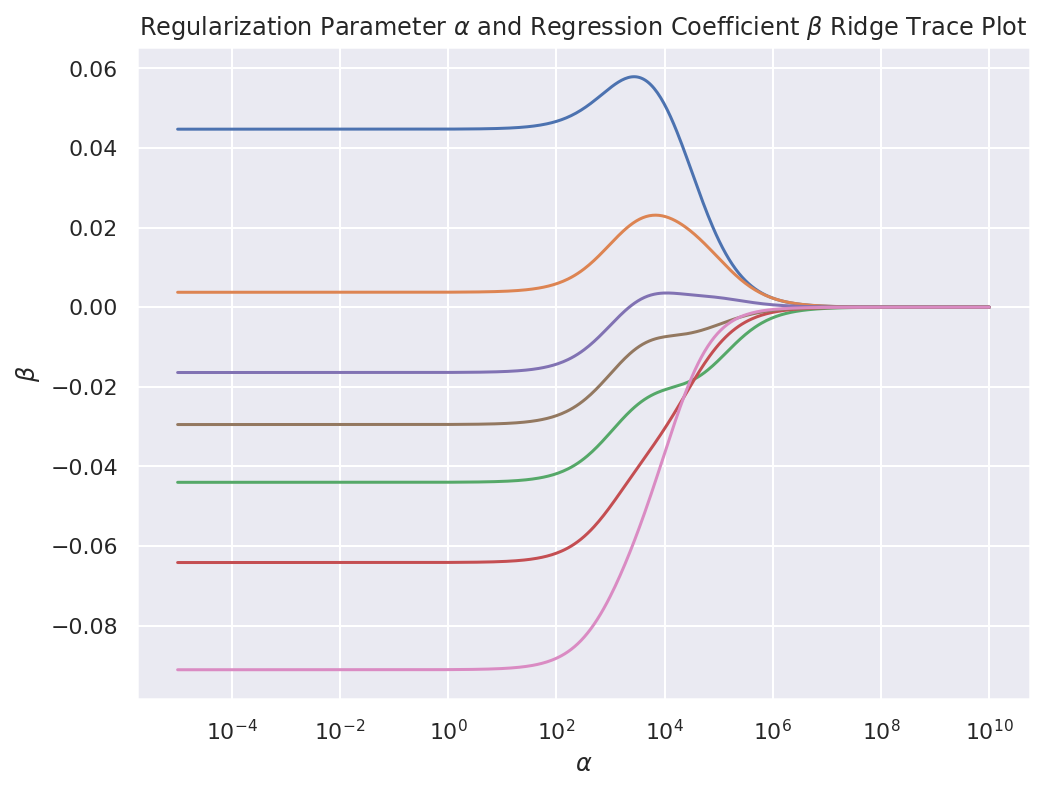

In [16]:
# In KFold, use one group of X_train and y_train to draw Ridge plot.
# Parameter set and model training
alphas=10**np.linspace(-5,10,500)
betas=[]
for alpha in alphas: 
  rd = Ridge(alpha = alpha)
  rd.fit(X_train, y_train)
  betas.append(rd.coef_)

# Draw Ridge plot
plt.figure(figsize=(8,6))
plt.plot(alphas,betas)

# Log transformation of data
plt.xscale('log')

# Add grid
plt.grid(True)

# Axis
plt.axis('tight')
plt.title(r'Regularization Parameter $\alpha$ and Regression Coefficient $\beta$ Ridge Trace Plot')
plt.xlabel(r'$\alpha$')
plt.ylabel(r'$\beta$')
plt.show()


In [17]:
# No use now.
# Cross-validated ridge regression
from sklearn.linear_model import RidgeCV
from sklearn import metrics
rd_cv = RidgeCV(alphas=alphas, cv=10, scoring='r2')
rd_cv.fit(X_train,y_train)
rd_cv.alpha_

102334.02121916423

In [18]:
# No use now.
# Model training using alpha equal to 102334.02121916423

rd=Ridge(alpha=102334.02121916423)
fit_intercept=False
rd.fit(X_train,y_train)
print(rd.coef_)
print(rd.intercept_)

[ 0.01657333  0.01215781 -0.01316842 -0.00922416  0.00240426 -0.00430521
 -0.00615251]
32.838189322417


In [19]:
# No use now.
# Cross-validated ridge regression
from sklearn.linear_model import RidgeCV
from sklearn import metrics
rd_cv = RidgeCV(alphas=alphas, cv=10, scoring='r2')
rd_cv.fit(X_train,y_train)

# Model training using alpha equal to rd_cv.alpha_
rd=Ridge(alpha=rd_cv.alpha_)
fit_intercept=False
rd.fit(X_train,y_train)
print(rd.coef_)
print(rd.intercept_)

[ 0.01657333  0.01215781 -0.01316842 -0.00922416  0.00240426 -0.00430521
 -0.00615251]
32.838189322417


In [20]:
# Modified Ridge Regression
# Model set up & training
from sklearn.linear_model import Ridge

# TODO: Import 'KFold'
from sklearn.model_selection import KFold

# TODO Calculate the r2 score between 'y_true' and 'y_predict'
from math import sqrt
from sklearn import metrics

# Cross-validated ridge regression
from sklearn.linear_model import RidgeCV

np.random.seed(seed = 154)
data['random'] = np.random.random(size = len(data))

# Lets split the data into 3 folds.  
kf =KFold(n_splits=3, shuffle=True)

cnt = 1

rd_intercept_all=[]
rd_coef_all=[]

MAE_train_all=[]
MAE_test_all=[]
y_train_rmse_all=[]
y_test_rmse_all=[]
r2_train_all=[]
r2_test_all=[]
MRE_train_all=[]
MRE_test_all=[]
y_test_list=[]
y_pred_list=[]

# split()  method generate indices to split data into training and test set.
for train_index, test_index in kf.split(Features, Oil_HHV):
    # print(f'Fold:{cnt}, Train set: {len(train_index)}, Test set:{len(test_index)}')
    
    #fixed by Wenjing
    X_train, X_test = Features.iloc[train_index,:],Features.iloc[test_index,:]
    y_train, y_test = Oil_HHV.iloc[train_index],Oil_HHV.iloc[test_index]
    
    rd_cv = RidgeCV(alphas=alphas, cv=10, scoring='r2')
    rd_cv.fit(X_train,y_train)
    
    # Model training using alpha equal to rd_cv.alpha_
    rd=Ridge(alpha=rd_cv.alpha_)
    fit_intercept=False
    rd.fit(X_train, y_train)
    # print(rd.coef_)
    # print(rd.intercept_)

    # Predict training set and test set
    y_train_predict = rd.predict(X_train)
    y_test_predict = rd.predict(X_test)

    MAE_train = metrics.mean_absolute_error(y_train, y_train_predict)
    MAE_test = metrics.mean_absolute_error(y_test, y_test_predict)

    y_train_rmse = sqrt(metrics.mean_squared_error(y_train, y_train_predict))
    y_test_rmse = sqrt(metrics.mean_squared_error(y_test, y_test_predict))

    r2_train = metrics.r2_score(y_train, y_train_predict)
    r2_test = metrics.r2_score(y_test, y_test_predict)

    MRE_train = performance_metric(y_train, y_train_predict)
    MRE_test = performance_metric(y_test, y_test_predict)

    # print("Optimal model has MAE of training set:", MAE_train)
    # print("Optimal model has MAE of test set:", MAE_test)
    # print("Optimal model has RMSE of training set:", y_train_rmse)
    # print("Optimal model has RMSE of test set:", y_test_rmse)
    # print("Optimal model has R2 score of training set {:,.2f} on training data.".format(r2_train))
    # print("Optimal model has R2 score of test set {:,.2f} on test data.".format(r2_test))
    # print("Optimal model has MRE of training set:", MRE_train)
    # print("Optimal model has MRE of test set:", MRE_test)
    # print("")

    cnt += 1
    rd_intercept_all.append(rd.intercept_)
    rd_coef_all.append(rd.coef_)
    MAE_train_all.append(MAE_train)
    MAE_test_all.append(MAE_test)
    y_train_rmse_all.append(y_train_rmse)
    y_test_rmse_all.append(y_test_rmse)
    r2_train_all.append(r2_train)
    r2_test_all.append(r2_test)
    MRE_train_all.append(MRE_train)
    MRE_test_all.append(MRE_test)
    y_test_list.append(y_test.values)
    y_pred_list.append(y_test_predict)

y_test_all=np.concatenate(y_test_list, axis=0)
y_pred_all=np.concatenate(y_pred_list, axis=0)

print("Mean value of rd.intercept",np.mean(rd_intercept_all))
print("Standard deviation of rd.intercept",np.std(rd_intercept_all))
print("Mean values of rd.coef",np.mean(rd_coef_all, axis=0))
print("Standard deviations of rd.coef",np.std(rd_coef_all, axis=0))
print("")
print("Mean value of MAE of training set", np.mean(MAE_train_all))
print("Standard deviation of MAE of training set", np.std(MAE_train_all))
print("Mean value of MAE of test set", np.mean(MAE_test_all))
print("Standard deviation of MAE of test set", np.std(MAE_test_all))
print("")
print("Mean value of RMSE of training set", np.mean(y_train_rmse_all))
print("Standard deviation of RMSE of training set", np.std(y_train_rmse_all))
print("Mean value of RMSE of test set", np.mean(y_test_rmse_all))
print("Standard deviation of RMSE of test set", np.std(y_test_rmse_all))
print("")
print("Mean value of R2 of training set", np.mean(r2_train_all))
print("Standard deviation of R2 of training set", np.std(r2_train_all))
print("Mean value of R2 of test set", np.mean(r2_test_all))
print("Standard deviation of R2 of test set", np.std(r2_test_all))
print("")
print("Mean value of MRE of training set", np.mean(MRE_train_all))
print("Standard deviation of MRE of training set", np.std(MRE_train_all))
print("Mean value of MRE of test set", np.mean(MRE_test_all))
print("Standard deviation of MRE of test set", np.std(MRE_test_all))

#print(len(np.concatenate(y_test_list, axis=0)))
#print(len(np.concatenate(y_pred_list, axis=0)))

Mean value of rd.intercept 32.983105113135416
Standard deviation of rd.intercept 0.10666374874818293
Mean values of rd.coef [ 0.02531328  0.02566163 -0.01814771 -0.00718212  0.00080929 -0.01054242
 -0.01447403]
Standard deviations of rd.coef [0.00905058 0.01378939 0.00358918 0.00401078 0.00405872 0.00500972
 0.00840814]

Mean value of MAE of training set 3.518384646240586
Standard deviation of MAE of training set 0.25985765234233876
Mean value of MAE of test set 3.6920800477775035
Standard deviation of MAE of test set 0.19207173191913152

Mean value of RMSE of training set 4.685060943665969
Standard deviation of RMSE of training set 0.34828375578215426
Mean value of RMSE of test set 4.809900605742571
Standard deviation of RMSE of test set 0.47096073915595327

Mean value of R2 of training set 0.1494254212389039
Standard deviation of R2 of training set 0.053267956347593196
Mean value of R2 of test set 0.08972584103590842
Standard deviation of R2 of test set 0.024862122830394042

Mean val

Text(0.5, 1.0, 'y_pred vs. y_true')

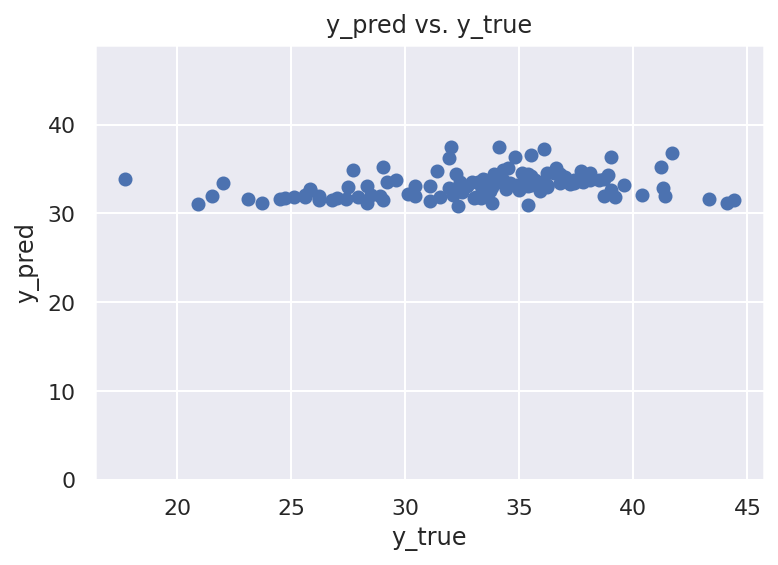

In [21]:
import matplotlib.pyplot as py
py.plot(y_test_all, y_pred_all, 'bo')
py.ylim(0, 49)
py.xlabel('y_true')
py.ylabel('y_pred')
py.title('y_pred vs. y_true')

In [ ]:
Parity={'Predict Data':y_pred_all,'Test Data':y_test_all}
df = pd.DataFrame(Parity, columns= ['Predict Data', 'Test Data'])
df.to_csv (r'/content/export_dataframe_HHV_MLR_Ridge.csv', index = False, header=True)

In [ ]:
# No use now.
# Predict Bio-crude Oil Yield
# Produce a matrix for feedstock composition data
feedstock_composition_data = [[21.9, 17.8, 0, 0, 58.9, 0, 1.1], # Model Food Waste
                              [19.7, 13.5, 0, 0, 22.9, 0, 7.3],  # N.salina
                              [5.5, 45.3, 0, 0, 14.5, 0, 10.4]]  # G.sulphuraria    
# Show predictions
for i, Oil_Yield in enumerate(rd.predict(feedstock_composition_data)):
  print("Predicted bio-crude oil yield for the composition of Feedstock {}: {:,.2f} wt%".format(i+1,Oil_Yield))

Predicted bio-crude oil yield for the composition of Feedstock 1: 31.61 wt%
Predicted bio-crude oil yield for the composition of Feedstock 2: 33.93 wt%
Predicted bio-crude oil yield for the composition of Feedstock 3: 27.95 wt%


In [ ]:
# No use now.
for i in [0,1,2]:
  vs.PredictTrials(Features, Oil_Yields, rd.fit, feedstock_composition_data[i:i+1])

Trial 1: $31.48
Trial 2: $32.31
Trial 3: $31.76
Trial 4: $33.10
Trial 5: $32.34
Trial 6: $31.55
Trial 7: $31.53
Trial 8: $32.90
Trial 9: $31.60
Trial 10: $31.56

Range in prices: $1.62
Trial 1: $34.08
Trial 2: $34.95
Trial 3: $35.01
Trial 4: $33.98
Trial 5: $35.02
Trial 6: $34.01
Trial 7: $33.92
Trial 8: $34.95
Trial 9: $34.49
Trial 10: $33.93

Range in prices: $1.11
Trial 1: $28.16
Trial 2: $29.29
Trial 3: $28.41
Trial 4: $28.17
Trial 5: $28.87
Trial 6: $27.94
Trial 7: $28.05
Trial 8: $28.55
Trial 9: $28.42
Trial 10: $28.36

Range in prices: $1.35


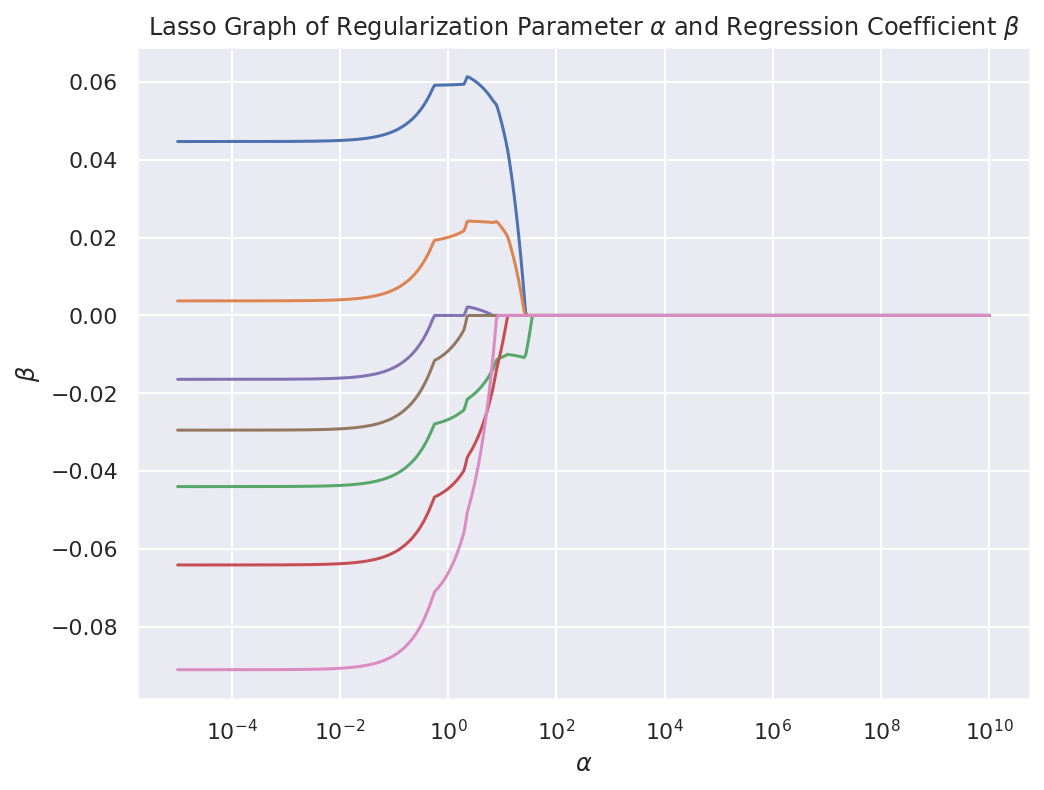

In [22]:
# In KFold, use one group of X_train and y_train to draw Lasso plot.
# Model training
from sklearn.linear_model import Lasso
alphas = 10**np.linspace(-5,10,500)
betas = []
for alpha in alphas:
  Las = Lasso(alpha = alpha)
  Las.fit(X_train,y_train)
  betas.append(Las.coef_)
plt.figure(figsize=(8,6))
plt.plot(alphas,betas)
plt.xscale('log')
plt.grid(True)
plt.axis('tight')
plt.title(r'Lasso Graph of Regularization Parameter $\alpha$ and Regression Coefficient $\beta$')
plt.xlabel(r'$\alpha$')
plt.ylabel(r'$\beta$')
plt.show()

In [23]:
# No use now.
# Optimize regularization parameter of Lasso regression using cross-validation 
from sklearn.linear_model import LassoCV
from sklearn import metrics
Las_cv = LassoCV(alphas=alphas,cv=10)
Las_cv.fit(X_train,y_train)
Las_cv.alpha_

10000000000.0

In [24]:
# No use now.
# Train model using alpha equal to 10000000000.0
Las = Lasso(alpha=10000000000.0)
fit_intercept=False
Las.fit(X_train,y_train)
print(Las.coef_)
print(Las.intercept_)

[ 0.  0. -0. -0.  0. -0. -0.]
32.87317073170731


In [25]:
# No use now.
# Optimize regularization parameter of Lasso regression using cross-validation 
from sklearn.linear_model import LassoCV
from sklearn import metrics
Las_cv = LassoCV(alphas=alphas,cv=10)
Las_cv.fit(X_train,y_train)

# Train model using alpha equal to Las_cv.alpha_
Las = Lasso(alpha=Las_cv.alpha_)
fit_intercept=False
Las.fit(X_train,y_train)
print(Las.coef_)
print(Las.intercept_)

[ 0.  0. -0. -0.  0. -0. -0.]
32.87317073170731


In [26]:
# Modified Lasso Regression
# Model set up & training
from sklearn.linear_model import Lasso

# TODO: Import 'KFold'
from sklearn.model_selection import KFold

# TODO Calculate the r2 score between 'y_true' and 'y_predict'
from math import sqrt
from sklearn import metrics

# Cross-validated ridge regression
from sklearn.linear_model import LassoCV

np.random.seed(seed = 154)
data['random'] = np.random.random(size = len(data))

# Lets split the data into 3 folds.  
kf =KFold(n_splits=3, shuffle=True)

cnt = 1

Las_intercept_all=[]
Las_coef_all=[]

MAE_train_all=[]
MAE_test_all=[]
y_train_rmse_all=[]
y_test_rmse_all=[]
r2_train_all=[]
r2_test_all=[]
MRE_train_all=[]
MRE_test_all=[]
y_test_list=[]
y_pred_list=[]

# split()  method generate indices to split data into training and test set.
for train_index, test_index in kf.split(Features, Oil_HHV):
    # print(f'Fold:{cnt}, Train set: {len(train_index)}, Test set:{len(test_index)}')
    
    #fixed by Wenjing
    X_train, X_test = Features.iloc[train_index,:],Features.iloc[test_index,:]
    y_train, y_test = Oil_HHV.iloc[train_index],Oil_HHV.iloc[test_index]
    
    Las_cv = LassoCV(alphas=alphas,cv=10)
    Las_cv.fit(X_train,y_train)
    
    # Train model using alpha equal to Las_cv.alpha_
    Las = Lasso(alpha=Las_cv.alpha_)
    fit_intercept=False
    Las.fit(X_train,y_train)
    # print(rd.coef_)
    # print(rd.intercept_)

    # Predict training set and test set
    y_train_predict = Las.predict(X_train)
    y_test_predict = Las.predict(X_test)

    MAE_train = metrics.mean_absolute_error(y_train, y_train_predict)
    MAE_test = metrics.mean_absolute_error(y_test, y_test_predict)

    y_train_rmse = sqrt(metrics.mean_squared_error(y_train, y_train_predict))
    y_test_rmse = sqrt(metrics.mean_squared_error(y_test, y_test_predict))

    r2_train = metrics.r2_score(y_train, y_train_predict)
    r2_test = metrics.r2_score(y_test, y_test_predict)

    MRE_train = performance_metric(y_train, y_train_predict)
    MRE_test = performance_metric(y_test, y_test_predict)

    # print("Optimal model has MAE of training set:", MAE_train)
    # print("Optimal model has MAE of test set:", MAE_test)
    # print("Optimal model has RMSE of training set:", y_train_rmse)
    # print("Optimal model has RMSE of test set:", y_test_rmse)
    # print("Optimal model has R2 score of training set {:,.2f} on training data.".format(r2_train))
    # print("Optimal model has R2 score of test set {:,.2f} on test data.".format(r2_test))
    # print("Optimal model has MRE of training set:", MRE_train)
    # print("Optimal model has MRE of test set:", MRE_test)
    # print("")

    cnt += 1
    Las_intercept_all.append(Las.intercept_)
    Las_coef_all.append(Las.coef_)
    MAE_train_all.append(MAE_train)
    MAE_test_all.append(MAE_test)
    y_train_rmse_all.append(y_train_rmse)
    y_test_rmse_all.append(y_test_rmse)
    r2_train_all.append(r2_train)
    r2_test_all.append(r2_test)
    MRE_train_all.append(MRE_train)
    MRE_test_all.append(MRE_test)
    y_test_list.append(y_test.values)
    y_pred_list.append(y_test_predict)

y_test_all=np.concatenate(y_test_list, axis=0)
y_pred_all=np.concatenate(y_pred_list, axis=0)

print("Mean value of Las.intercept",np.mean(Las_intercept_all))
print("Standard deviation of Las.intercept",np.std(Las_intercept_all))
print("Mean values of Las.coef",np.mean(Las_coef_all, axis=0))
print("Standard deviations of Las.coef",np.std(Las_coef_all, axis=0))
print("")
print("Mean value of MAE of training set", np.mean(MAE_train_all))
print("Standard deviation of MAE of training set", np.std(MAE_train_all))
print("Mean value of MAE of test set", np.mean(MAE_test_all))
print("Standard deviation of MAE of test set", np.std(MAE_test_all))
print("")
print("Mean value of RMSE of training set", np.mean(y_train_rmse_all))
print("Standard deviation of RMSE of training set", np.std(y_train_rmse_all))
print("Mean value of RMSE of test set", np.mean(y_test_rmse_all))
print("Standard deviation of RMSE of test set", np.std(y_test_rmse_all))
print("")
print("Mean value of R2 of training set", np.mean(r2_train_all))
print("Standard deviation of R2 of training set", np.std(r2_train_all))
print("Mean value of R2 of test set", np.mean(r2_test_all))
print("Standard deviation of R2 of test set", np.std(r2_test_all))
print("")
print("Mean value of MRE of training set", np.mean(MRE_train_all))
print("Standard deviation of MRE of training set", np.std(MRE_train_all))
print("Mean value of MRE of test set", np.mean(MRE_test_all))
print("Standard deviation of MRE of test set", np.std(MRE_test_all))

#print(len(np.concatenate(y_test_list, axis=0)))
#print(len(np.concatenate(y_pred_list, axis=0)))

Mean value of Las.intercept 32.36456221328624
Standard deviation of Las.intercept 0.3694030730178306
Mean values of Las.coef [ 0.03213596  0.02901815 -0.00817058  0.          0.00141078  0.
  0.        ]
Standard deviations of Las.coef [0.02337061 0.0226009  0.00721675 0.         0.00199514 0.
 0.        ]

Mean value of MAE of training set 3.595092127324462
Standard deviation of MAE of training set 0.36397821301400696
Mean value of MAE of test set 3.799375546501064
Standard deviation of MAE of test set 0.24651685931804557

Mean value of RMSE of training set 4.762712166113741
Standard deviation of RMSE of training set 0.4346686300782209
Mean value of RMSE of test set 4.913439123417427
Standard deviation of RMSE of test set 0.3850561364550982

Mean value of R2 of training set 0.12088113710158861
Standard deviation of R2 of training set 0.08699076122287767
Mean value of R2 of test set 0.04345392757547595
Standard deviation of R2 of test set 0.08203798492037102

Mean value of MRE of train

Text(0.5, 1.0, 'y_pred vs. y_true')

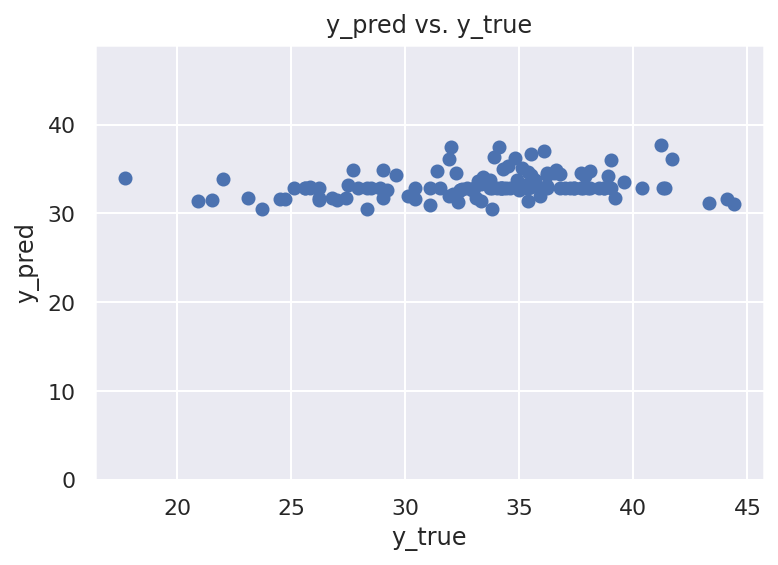

In [27]:
import matplotlib.pyplot as py
py.plot(y_test_all, y_pred_all, 'bo')
py.ylim(0, 49)
py.xlabel('y_true')
py.ylabel('y_pred')
py.title('y_pred vs. y_true')

In [ ]:
Parity={'Predict Data':y_pred_all,'Test Data':y_test_all}
df = pd.DataFrame(Parity, columns= ['Predict Data', 'Test Data'])
df.to_csv (r'/content/export_dataframe_HHV_MLR_Lasso.csv', index = False, header=True)

In [ ]:
# No use now.
# Predict Bio-crude Oil Yield
# Produce a matrix for feedstock composition data
feedstock_composition_data = [[21.9, 17.8, 0, 0, 58.9, 0, 1.1], # Model Food Waste
                              [19.7, 13.5, 0, 0, 22.9, 0, 7.3],  # N.salina
                              [5.5, 45.3, 0, 0, 14.5, 0, 10.4]]  # G.sulphuraria    
# Show predictions
for i, Oil_Yield in enumerate(Las.predict(feedstock_composition_data)):
  print("Predicted bio-crude oil yield for the composition of Feedstock {}: {:,.2f} wt%".format(i+1,Oil_Yield))

Predicted bio-crude oil yield for the composition of Feedstock 1: 32.15 wt%
Predicted bio-crude oil yield for the composition of Feedstock 2: 31.07 wt%
Predicted bio-crude oil yield for the composition of Feedstock 3: 26.72 wt%


In [ ]:
# No use now.
for i in [0,1,2]:
  vs.PredictTrials(Features, Oil_Yields, Las.fit, feedstock_composition_data[i:i+1])

Trial 1: $32.24
Trial 2: $33.02
Trial 3: $32.43
Trial 4: $33.78
Trial 5: $32.94
Trial 6: $32.17
Trial 7: $32.12
Trial 8: $33.74
Trial 9: $32.31
Trial 10: $32.20

Range in prices: $1.67
Trial 1: $31.13
Trial 2: $32.12
Trial 3: $32.02
Trial 4: $31.74
Trial 5: $32.59
Trial 6: $31.45
Trial 7: $31.46
Trial 8: $31.78
Trial 9: $32.13
Trial 10: $31.34

Range in prices: $1.46
Trial 1: $26.00
Trial 2: $27.27
Trial 3: $26.28
Trial 4: $26.51
Trial 5: $27.06
Trial 6: $26.13
Trial 7: $26.27
Trial 8: $26.37
Trial 9: $26.65
Trial 10: $26.48

Range in prices: $1.26
